In [1]:
#Import

In [326]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.proportion import proportions_ztest
from tqdm.notebook import tqdm
#Пропущенные данные
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
#Препроцессинг
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.linear_model import ElasticNet, BayesianRidge, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
# import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

from sklearn.linear_model import ElasticNet, BayesianRidge, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
#Визуализация
from sklearn.metrics import PredictionErrorDisplay

In [327]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
df = pd.read_csv(path_train)

In [328]:
# Блок(и) подбора

Метрика MAPE

In [329]:
df

,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,-0.465315,-1.592404,-1.668320,-0.929397,1.517692,-0.142607,0.994994,1.472618,-0.280781,1.860696,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,-0.465315,0.729512,0.913740,-0.929397,-0.805741,0.307755,1.615664,-0.679063,1.311928,-1.087695,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,-0.465315,-0.024866,0.427448,0.224410,-0.805741,-1.033235,1.648072,-0.679063,0.470806,0.217582,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,-0.465315,0.445396,1.056981,-0.929397,-0.805741,-1.119627,1.488127,-0.679063,-1.039726,0.442600,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,-0.465315,-0.024866,-0.825728,0.224410,-0.805741,0.232269,-1.316654,1.472618,1.747297,-1.109080,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,0.0,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,-0.465315,-0.024866,0.343618,0.224410,-0.805741,2.948326,1.045927,1.472618,1.491291,-1.123612,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,0.0,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,2.149083,-0.024866,-1.312213,0.224410,0.355976,1.138751,-1.352775,-0.679063,-0.269301,1.375053,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.0,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,2.149083,-0.975186,0.524128,-0.929397,1.517692,-0.653206,1.140005,-0.679063,-1.273605,-1.181372,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,0.0,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,-0.465315,0.253372,-0.994006,-0.929397,-0.805741,0.330239,1.305237,-0.679063,1.109630,-0.349190,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [330]:
df.head()

,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,-0.465315,-1.592404,-1.668320,-0.929397,1.517692,-0.142607,0.994994,1.472618,-0.280781,1.860696,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,-0.465315,0.729512,0.913740,-0.929397,-0.805741,0.307755,1.615664,-0.679063,1.311928,-1.087695,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,-0.465315,-0.024866,0.427448,0.224410,-0.805741,-1.033235,1.648072,-0.679063,0.470806,0.217582,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,-0.465315,0.445396,1.056981,-0.929397,-0.805741,-1.119627,1.488127,-0.679063,-1.039726,0.442600,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,-0.465315,-0.024866,-0.825728,0.224410,-0.805741,0.232269,-1.316654,1.472618,1.747297,-1.109080,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322


In [331]:
df.describe()

,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.643597e+06,-0.030652,0.0,-0.021898,-0.004470,-0.044734,-0.015345,-0.037179,0.005930,-0.005686,-0.016766,-0.049938,0.050711,-0.049902,-0.036958,-0.033847,-0.018777,-0.035668,-0.008261,-0.061349,-0.046552,-0.022184,-0.042466,0.017890,-0.043530,-0.039454,-0.038181,-0.048110,-0.025252,-0.044926
std,1.711368e+06,1.031893,0.0,1.019428,0.974612,0.969756,0.996282,1.001595,0.976837,1.007006,0.986851,1.013027,0.991348,0.980538,0.989583,0.980263,0.987751,0.986310,0.988047,0.898859,0.991383,1.020601,0.995270,1.016147,0.900616,0.975409,1.031259,1.008422,1.001805,0.913917
min,1.750000e+06,-2.465344,0.0,-1.224688,-1.780233,-2.633407,-0.734539,-1.614530,-0.570187,-4.050087,-0.465315,-5.413279,-1.691355,-0.929397,-0.805741,-1.589857,-1.705826,-0.679063,-1.669422,-1.508830,-1.705711,-2.319351,-2.665004,-1.406286,-0.219265,-0.554035,-5.000645,-1.789595,-1.705457,-3.418780
25%,3.430000e+06,0.405623,0.0,-0.673496,-0.837351,-0.223185,-0.734539,-0.745125,-0.570187,-0.478408,-0.465315,-0.037112,-0.826372,-0.929397,-0.805741,-0.742003,-0.853757,-0.679063,-0.853475,-0.739260,-0.881357,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,-0.126718,-0.896013,-0.887341,-0.141322
50%,4.270000e+06,0.405623,0.0,-0.252391,0.032263,-0.223185,-0.734539,-0.300045,-0.570187,-0.478408,-0.465315,-0.024866,0.077075,0.224410,-0.805741,-0.284471,-0.016293,-0.679063,-0.108781,-0.231619,-0.072463,-0.263991,0.047278,-0.091662,-0.219265,-0.554035,-0.126718,-0.047954,-0.050893,-0.141322
75%,5.600000e+06,0.405623,0.0,0.312075,0.775898,-0.223185,1.361397,0.454055,1.421812,1.307431,-0.465315,0.284968,0.912021,0.224410,0.355976,0.507376,0.772849,1.472618,0.785738,0.349557,0.755884,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.006287,0.787204,0.798591,-0.141322
max,1.141000e+07,0.405623,0.0,8.604753,1.732550,13.826353,1.361397,5.096263,3.413810,3.093270,2.149083,4.285865,1.747152,2.532024,2.679409,3.233920,1.795972,1.472618,1.815382,3.360617,1.745647,7.957450,4.115701,1.222962,4.560702,1.804941,13.021551,1.732996,1.771548,3.136137


In [332]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [333]:
print(df.duplicated().unique())

[False]


In [334]:
df = df.drop_duplicates()

In [335]:
y = df.price
X = df.drop(columns = 'price')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [336]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_percentage_error

pipe = Pipeline(steps=[
    ('preproc', StandardScaler()),
    ('estimator', RandomForestRegressor(n_estimators= 1000,n_jobs = -1, warm_start = True, max_features = 'sqrt', random_state = 42))
    ])


pipe.fit(X_train,y_train)
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

0.1929552835778119

<Figure size 1080x576 with 0 Axes>

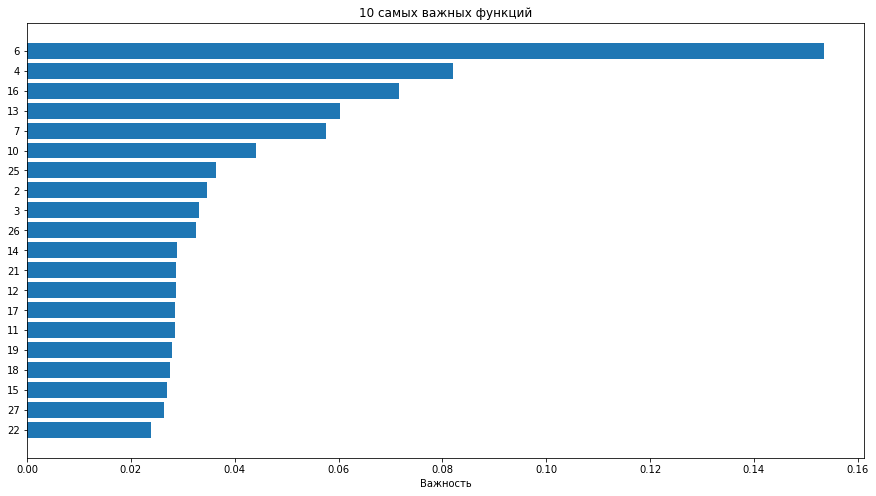

In [337]:
from sklearn.pipeline import make_pipeline
preobr = Pipeline([
    ('scal',StandardScaler())
]).set_output(transform="pandas")
X_train =preobr.fit_transform(X_train)
plt.figure(figsize=(15,8))
feature_names =  X_train.columns.tolist()
importance = pipe.named_steps['estimator'].feature_importances_

sorted_indices = np.argsort(importance)[::-1]
top_10_features = [feature_names[i] for i in sorted_indices[:20]]
top_10_importance = importance[sorted_indices][:20]

# Постройте горизонтальную гистограмму для 10 основных функций
plt.figure(figsize=(15, 8))
plt.barh(width=top_10_importance, y=top_10_features)
plt.gca().invert_yaxis()
plt.title("10 самых важных функций")
plt.xlabel("Важность")
plt.show()


1
Index(['1'], dtype='object')


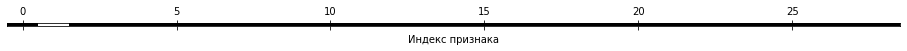

In [338]:
from sklearn.feature_selection import VarianceThreshold

th = 0.85
transform_threshold = VarianceThreshold(threshold=(th * (1 - th)))
transform_threshold.fit_transform(X_train)
mask = transform_threshold.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.1);
plt.yticks([])
plt.xlabel("Индекс признака")
np.unique(transform_threshold.get_support())
false_features = np.where(~mask)[0]
print(len(false_features))
false_feature_names = X_train.columns[false_features]
print(false_feature_names)

Index(['0', '1', '5', '8', '9', '11', '12', '14', '15', '17', '18', '19', '20',
       '21', '22', '23', '24', '27', '28'],
      dtype='object')


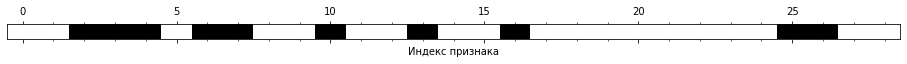

In [339]:
from sklearn.feature_selection  import RFE


rfe_select = Pipeline([
    ('estimator', RFE(RandomForestRegressor(n_estimators= 1000,n_jobs = -1, warm_start = True, max_features = 'sqrt'), n_features_to_select=10))
    ])


rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.named_steps['estimator'].support_
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");



selected_features = rfe_select.named_steps['estimator'].get_support()
# Get the names of the columns that are selected for elimination
selected_columns = X_train.columns[~selected_features]
# Print the selected columns
print(selected_columns)

форма обуч набора X: (285, 29)
форма обуч набора X median: (285, 15)


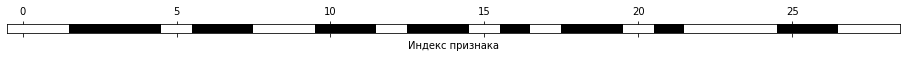

Index(['0', '1', '5', '8', '9', '12', '15', '17', '20', '22', '23', '24', '27',
       '28'],
      dtype='object')


In [340]:
from sklearn.feature_selection import SelectFromModel


select = Pipeline([
    ('estimator', SelectFromModel(RandomForestRegressor(n_estimators= 1000,n_jobs = -1, warm_start = True, max_features = 'sqrt'), threshold="median"))
    ])


select.fit(X_train, y_train)
X_train_med = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X median: {}".format(X_train_med.shape))
mask = select.named_steps['estimator'].get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

selected_features = select.named_steps['estimator'].get_support()
# Get the names of the columns that are selected for elimination
selected_columns_1 = X_train.columns[~selected_features]
# Print the selected columns
print(selected_columns_1)

In [341]:
from sklearn.feature_selection import SelectPercentile

форма массива X_train: (285, 79)
форма массива X_train_selected: (285, 39)
Dropped features:  [1, 2, 3, 11, 14, 15, 17, 18, 19, 23, 26, 27, 29, 30, 31, 32, 35, 37, 40, 46, 48, 49, 50, 51, 53, 54, 59, 60, 61, 62, 63, 64, 69, 70, 71, 72, 74, 75, 76, 78]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


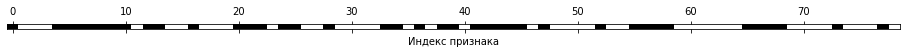

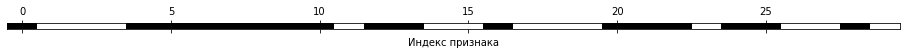

In [342]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(X_train), 50))
X_train = np.hstack([X_train, noise])

# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)

# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

mask = select_pct.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

mask = select_pct.get_support()[:30]
plt.matshow(mask.reshape(1,-1), cmap='gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");

mask = select_pct.get_support()
selected_features = [col for col, sel in zip(np.arange(X_train.shape[1]), mask) if sel]
dropped_features = [col for col in np.arange(X_train.shape[1]) if col not in selected_features]
print("Dropped features: ", dropped_features)

In [343]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 5 informative features


# Create the RFE object and compute a cross-validated score.
svc = LinearSVR()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=KFold(4),
    scoring="neg_mean_absolute_percentage_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Оптимально : %d" % rfecv.n_features_)



Оптимально : 17


,mean,std
23,0.039646,0.038301
7,0.056053,0.079700
4,0.075083,0.115063
16,0.086722,0.076198
6,0.293101,0.109244


Index(['1', '20', '9', '8', '0', '28', '21', '12', '24', '5', '11', '19', '22',
       '27', '18', '14', '26', '17', '15', '3', '2', '10', '25', '13', '23',
       '7', '4', '16', '6'],
      dtype='object')


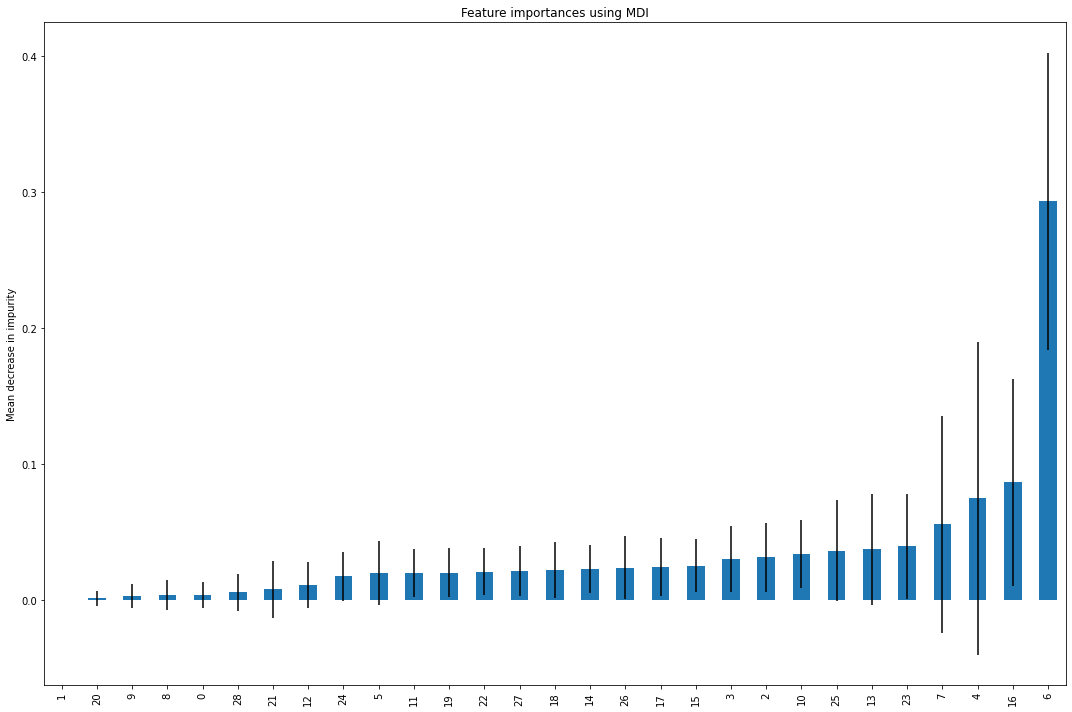

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
forest = RandomForestRegressor(n_estimators=500, random_state=42)
forest.fit(X_train, y_train)
feature_names = X_train.columns
forest_importances = pd.DataFrame(forest.feature_importances_, index=feature_names, columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest.tail(5))

print(sort_forest.index)

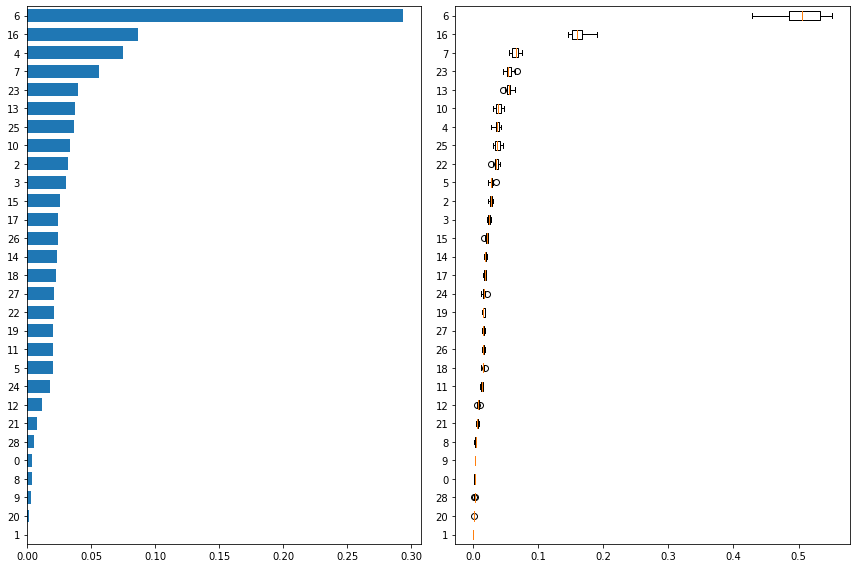

Колонки, которые нужно исключить:
 Index(['1', '20', '28', '0', '9', '8', '21', '12', '11', '18', '26', '27',
       '19', '24', '17', '14', '15', '3', '2', '5', '22', '25', '4', '10',
       '13', '23', '7', '16', '6'],
      dtype='object')


In [345]:
from sklearn.inspection import permutation_importance
result = permutation_importance(forest, X_train, y_train, n_repeats=10, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(forest.feature_importances_)
tree_indices = np.arange(0, len(forest.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices, forest.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(forest.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_train.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()


columns_to_drop = X_train.columns[perm_sorted_idx]
print("Колонки, которые нужно исключить:\n", columns_to_drop)

In [346]:
false_feature_names #удаляем обязательно
false_feature_names


Index(['1'], dtype='object')

In [347]:
selected_columns

Index(['0', '1', '5', '8', '9', '11', '12', '14', '15', '17', '18', '19', '20',
       '21', '22', '23', '24', '27', '28'],
      dtype='object')

In [348]:
selected_columns_1

Index(['0', '1', '5', '8', '9', '12', '15', '17', '20', '22', '23', '24', '27',
       '28'],
      dtype='object')

In [349]:
to_dropped = ((selected_columns & selected_columns_1) | false_feature_names)
print(to_dropped, 'колво' ,len(to_dropped))

Index(['0', '1', '12', '15', '17', '20', '22', '23', '24', '27', '28', '5',
       '8', '9'],
      dtype='object') колво 14


<ipython-input-349-7e6acffba145>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  to_dropped = ((selected_columns & selected_columns_1) | false_feature_names)
<ipython-input-349-7e6acffba145>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  to_dropped = ((selected_columns & selected_columns_1) | false_feature_names)


In [350]:
dropped_features


[1,
 2,
 3,
 11,
 14,
 15,
 17,
 18,
 19,
 23,
 26,
 27,
 29,
 30,
 31,
 32,
 35,
 37,
 40,
 46,
 48,
 49,
 50,
 51,
 53,
 54,
 59,
 60,
 61,
 62,
 63,
 64,
 69,
 70,
 71,
 72,
 74,
 75,
 76,
 78]

In [351]:
a = sort_forest.index
a[:12]

Index(['1', '20', '9', '8', '0', '28', '21', '12', '24', '5', '11', '19'], dtype='object')

In [352]:
columns_to_drop[:12]

Index(['1', '20', '28', '0', '9', '8', '21', '12', '11', '18', '26', '27'], dtype='object')

In [353]:
to_dropped = (((to_dropped )& a[:12]) & columns_to_drop[:12])
to_dropped

<ipython-input-353-1f4752a10173>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  to_dropped = (((to_dropped )& a[:12]) & columns_to_drop[:12])


Index(['0', '1', '12', '20', '28', '8', '9'], dtype='object')

In [354]:
len(X_train.columns)

29

Всего столбцов 29, RFECV сказал, что оптимально 17 фич, ему мы верим -> надо удалить +-12 фич

In [355]:
len(to_dropped)

7

In [356]:
to_dropped

Index(['0', '1', '12', '20', '28', '8', '9'], dtype='object')

In [357]:
df = pd.read_csv(path_train)
df = df.drop(columns = to_dropped)
display(df)
y = df.price
X = df.drop(columns = 'price')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

pipe = Pipeline(steps=[
    ('preproc', StandardScaler()),
    ('estimator', RandomForestRegressor(n_estimators= 10000,n_jobs = -1, warm_start = True, max_features = 'sqrt', random_state = 42))
    ])


pipe.fit(X_train,y_train)
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

,price,2,3,4,5,6,7,10,11,13,14,15,16,17,18,19,21,22,23,24,25,26,27
0,5320000,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-1.592404,-1.668320,1.517692,-0.142607,0.994994,1.472618,-0.280781,1.860696,0.245475,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006
1,3465000,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,0.729512,0.913740,-0.805741,0.307755,1.615664,-0.679063,1.311928,-1.087695,-1.444928,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421
2,3500000,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.024866,0.427448,-0.805741,-1.033235,1.648072,-0.679063,0.470806,0.217582,1.578828,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005
3,3570000,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,0.445396,1.056981,-0.805741,-1.119627,1.488127,-0.679063,-1.039726,0.442600,-1.675466,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657
4,4130000,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.024866,-0.825728,-0.805741,0.232269,-1.316654,1.472618,1.747297,-1.109080,-1.347578,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.024866,0.343618,-0.805741,2.948326,1.045927,1.472618,1.491291,-1.123612,-1.341446,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553
404,5250000,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.024866,-1.312213,0.355976,1.138751,-1.352775,-0.679063,-0.269301,1.375053,-0.144745,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976
405,5950000,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.975186,0.524128,1.517692,-0.653206,1.140005,-0.679063,-1.273605,-1.181372,-0.734544,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372
406,4319000,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,0.253372,-0.994006,-0.805741,0.330239,1.305237,-0.679063,1.109630,-0.349190,-0.282323,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075


0.20094607127677522